In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
import seaborn as sns
from sklearn.model_selection import train_test_split


In [13]:
#load data into x and y
dataframe = pd.read_csv("car_price_prediction.csv")
dataframe.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [14]:
#no need to clean data
dataframe.info()
dataframe.isnull().sum()
dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [79]:

dataframe["Mileage"] = dataframe['Mileage'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)
dataframe["Engine volume"] = dataframe["Engine volume"].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)

features = ["Prod. year", "Engine volume", "Cylinders", "Mileage"]

y = dataframe["Price"].to_numpy()
x = dataframe["Prod. year"].to_numpy()

#print(x)
#print(dataframe.dtypes)
#corr_matrix = dataframe.corr()

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

print(x_train[:5])
print(type(x_train))
print(x_train.shape)

print(y_train[:5])
print(type(y_train))
print(y_train.shape)
#m (# of training ex) = 15389

[2013 2007 2010 2012 2000]
<class 'numpy.ndarray'>
(15389,)
[  314  6429 12388 14834 10036]
<class 'numpy.ndarray'>
(15389,)


(0.0, 200000.0)

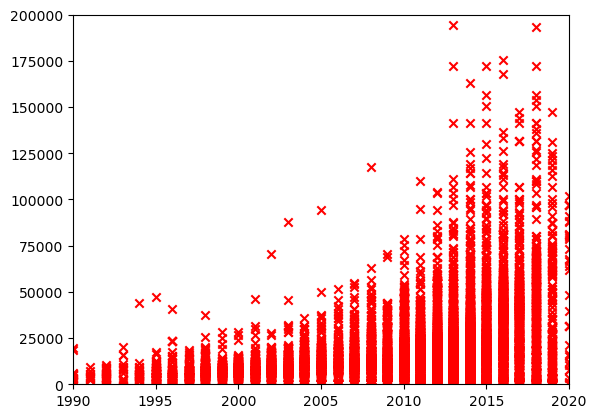

In [86]:
#plt.scatter(x_train[:,0], y_train, marker='x', c='y') 
plt.scatter(x_train, y_train, marker='x', c='r')
plt.xlim(1990, 2020)
plt.ylim(0, 200000)

In [ ]:
#f(x) = wx + b